In [1]:
# Libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

In [2]:
# [Step 1] Load the processed datasets
PoliceKillingUS = pd.read_csv('../processed_datasets/ProcessedPoliceKillingUS.csv', encoding='utf-8') 
PoliceKillingUS = PoliceKillingUS[PoliceKillingUS['date'] == 2016]  # Filter for 2016
PoliceKillingUS.head() 

,state,count,date,manner_of_death,armed,age,gender,race,city,signs_of_mental_illness,threat_level,flee,body_camera,percentage
50,AK,7,2016,shot,gun,23.0,M,N,Anchorage,False,attack,Not fleeing,False,0.726895
51,AL,25,2016,shot,gun,38.0,M,W,Phenix City,False,attack,Not fleeing,False,2.596054
52,AR,15,2016,shot,gun,33.0,M,W,Benton,False,other,Not fleeing,False,1.557632
53,AZ,50,2016,shot,gun,26.0,M,W,Phoenix,False,attack,Not fleeing,False,5.192108
54,CA,138,2016,shot,gun,31.0,M,H,Los Angeles,False,other,Not fleeing,False,14.330218


In [3]:
PovertyUS = pd.read_csv('../processed_datasets/ProcessedPovertyUS.csv', encoding='utf-8')
PovertyUS = PovertyUS[PovertyUS['Year'] == 2016]  # Filter for 2016 data
PovertyUS.head()

,Unnamed: 0,Year,ID,Name,Poverty Universe,Number in Poverty,90% Confidence Interval,Percent in Poverty,90% Confidence Interval.1
51,261,2016,1000,AL,4741355,814197,"796,927 to 831,467",17.2,16.8 to 17.6
52,262,2016,2000,AK,723955,71916,"67,813 to 76,019",9.9,9.3 to 10.5
53,263,2016,4000,AZ,6771106,1107153,"1,086,482 to 1,127,824",16.4,16.1 to 16.7
54,264,2016,5000,AR,2898653,497388,"485,180 to 509,596",17.2,16.8 to 17.6
55,265,2016,6000,CA,38513333,5527621,"5,475,835 to 5,579,407",14.4,14.3 to 14.5


In [4]:
# [Step 2] Merge the datasets on 'state' and 'Name'
Joined = pd.merge(PoliceKillingUS, PovertyUS, left_on='state', right_on='Name', how='outer')
Joined.fillna(0, inplace=True)  # Replace missing values with 0
Joined.loc[Joined['state'] == 0, 'state'] = Joined.loc[Joined['state'] == 0, 'Name']  # Replace missing state names
Joined.to_csv('./Joined.csv', index=False)  # Save the joined dataset for reference
Joined.head()

,state,count,date,manner_of_death,armed,age,gender,race,city,signs_of_mental_illness,...,percentage,Unnamed: 0,Year,ID,Name,Poverty Universe,Number in Poverty,90% Confidence Interval,Percent in Poverty,90% Confidence Interval.1
0,AK,7,2016,shot,gun,23.0,M,N,Anchorage,False,...,0.726895,262,2016,2000,AK,723955,71916,"67,813 to 76,019",9.9,9.3 to 10.5
1,AL,25,2016,shot,gun,38.0,M,W,Phenix City,False,...,2.596054,261,2016,1000,AL,4741355,814197,"796,927 to 831,467",17.2,16.8 to 17.6
2,AR,15,2016,shot,gun,33.0,M,W,Benton,False,...,1.557632,264,2016,5000,AR,2898653,497388,"485,180 to 509,596",17.2,16.8 to 17.6
3,AZ,50,2016,shot,gun,26.0,M,W,Phoenix,False,...,5.192108,263,2016,4000,AZ,6771106,1107153,"1,086,482 to 1,127,824",16.4,16.1 to 16.7
4,CA,138,2016,shot,gun,31.0,M,H,Los Angeles,False,...,14.330218,265,2016,6000,CA,38513333,5527621,"5,475,835 to 5,579,407",14.4,14.3 to 14.5


In [ ]:
Joined['Log Poverty'] = Joined['Percent in Poverty'] # Poverty rates
Joined['Log Killings'] = Joined['percentage'] # Homicide rates
Joined.head()

,state,count,date,manner_of_death,armed,age,gender,race,city,signs_of_mental_illness,...,Year,ID,Name,Poverty Universe,Number in Poverty,90% Confidence Interval,Percent in Poverty,90% Confidence Interval.1,Log Poverty,Log Killings
0,AK,7,2016,shot,gun,23.0,M,N,Anchorage,False,...,2016,2000,AK,723955,71916,"67,813 to 76,019",9.9,9.3 to 10.5,9.9,0.726895
1,AL,25,2016,shot,gun,38.0,M,W,Phenix City,False,...,2016,1000,AL,4741355,814197,"796,927 to 831,467",17.2,16.8 to 17.6,17.2,2.596054
2,AR,15,2016,shot,gun,33.0,M,W,Benton,False,...,2016,5000,AR,2898653,497388,"485,180 to 509,596",17.2,16.8 to 17.6,17.2,1.557632
3,AZ,50,2016,shot,gun,26.0,M,W,Phoenix,False,...,2016,4000,AZ,6771106,1107153,"1,086,482 to 1,127,824",16.4,16.1 to 16.7,16.4,5.192108
4,CA,138,2016,shot,gun,31.0,M,H,Los Angeles,False,...,2016,6000,CA,38513333,5527621,"5,475,835 to 5,579,407",14.4,14.3 to 14.5,14.4,14.330218


In [6]:
# [Step 4] Select the features for clustering
X = Joined[['Log Poverty', 'Log Killings']]

In [7]:
# [Step 5] Normalize the data using z-score normalization
xV1 = zscore(X.iloc[:, 0])
xV2 = zscore(X.iloc[:, 1])
X = np.transpose(np.array([xV1, xV2]))
print(X)

[[-1.22569368e+00 -5.28078558e-01]
 [ 1.20286277e+00  2.71882030e-01]
 [ 1.20286277e+00 -1.72540519e-01]
 [ 9.36719596e-01  1.38293840e+00]
 [ 2.71361666e-01  5.29385683e+00]
 [-8.59746815e-01  5.38535559e-01]
 [-1.22569368e+00 -6.61405323e-01]
 [ 1.63534542e+00 -6.16963068e-01]
 [-5.93603643e-01 -7.94732087e-01]
 [ 4.04433252e-01  1.82736095e+00]
 [ 8.36915906e-01  3.16324285e-01]
 [-1.35876526e+00 -5.72520813e-01]
 [-6.26871540e-01 -6.16963068e-01]
 [ 7.17542866e-02 -5.72520813e-01]
 [-1.94388885e-01  3.16324285e-01]
 [ 1.38290080e-01 -2.16982774e-01]
 [-4.60532057e-01 -3.94751793e-01]
 [ 1.53554173e+00 -3.92137543e-02]
 [ 2.16763177e+00  5.22850057e-03]
 [-1.02608630e+00 -3.05867284e-01]
 [-1.29222947e+00 -1.72540519e-01]
 [-4.27264161e-01 -7.50289832e-01]
 [ 4.37701148e-01 -2.61425029e-01]
 [-1.22569368e+00 -2.16982774e-01]
 [ 1.38290080e-01  9.41130103e-02]
 [ 2.46704283e+00 -4.83636303e-01]
 [-6.13172994e-02 -6.16963068e-01]
 [ 6.04040631e-01  6.27420069e-01]
 [-1.02608630e+00 -7

In [8]:
# [Step 6] Determine the number of clusters
numberOfRows, numberOfColumns = X.shape
k = int(input(f"Enter the number of clusters for K-means (from 2 to {numberOfRows}): "))
print(f"Number of clusters: {k}")

Number of clusters: 3


In [9]:
# [Step 7] Apply K-Means clustering
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
IDX = kmeans.labels_  # Get the labels of each cluster
print(IDX)

[1 2 2 2 0 1 1 2 1 0 2 1 1 1 1 1 1 2 2 1 1 1 2 1 1 2 1 2 1 1 1 1 2 1 2 2 2
 1 1 1 2 1 2 0 1 1 1 1 1 2 1]


In [10]:
C = kmeans.cluster_centers_  # Get the cluster centers
print(C)

[[ 0.44879045  3.30876945]
 [-0.66121259 -0.36607937]
 [ 1.1265423   0.08365601]]


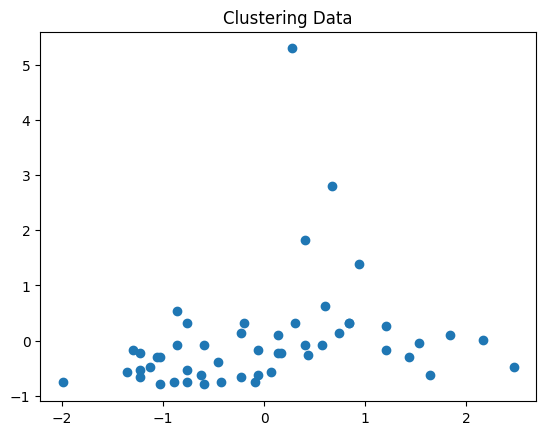

In [11]:
# [Step 8] Plotting the data points and clusters
plt.figure(1)
plt.scatter(X[:, 0], X[:, 1])  # Plot all data without clustering
plt.title("Clustering Data")
plt.show()

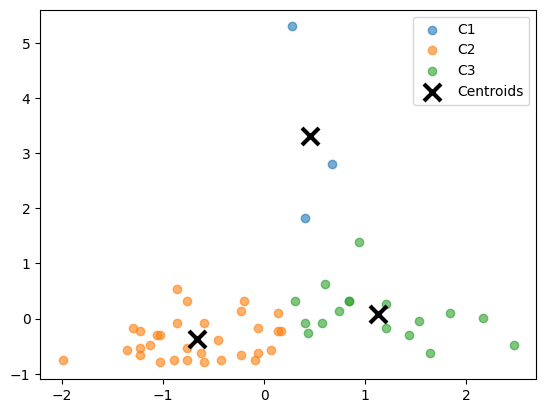

In [12]:
# [Step 9] Plot each cluster with different colors
colors = ['limegreen', 'yellow', 'c', 'purple']
for i in range(k):
    plt.scatter(X[IDX == i, 0], X[IDX == i, 1], label=f'C{i+1}', alpha=0.6)

# [Step 10] Plot the centroids
plt.scatter(C[:, 0], C[:, 1], marker='x', color='black', s=150, linewidth=3, label="Centroids", zorder=10)
plt.legend()
plt.show()

In [13]:
"""
    Draw the SSE Plot
"""
def plot_sse(max_clusters=10):
    # [Step 12.1] Calculate the SSE for different numbers of clusters
        sse = []
        for k in range(1, max_clusters + 1):
            kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
            kmeans.fit(X)
            sse.append(kmeans.inertia_)

        # [Step 12.2] Plot SSE vs. number of clusters to determine the optimal number of clusters (elbow method)
        plt.figure(figsize=(8, 6))
        plt.plot(range(1, max_clusters + 1), sse, marker='o')
        plt.xlabel('Number of Clusters')
        plt.ylabel('Sum of Squared Errors (SSE)')
        plt.title('Elbow Method For Optimal k')
        plt.show()

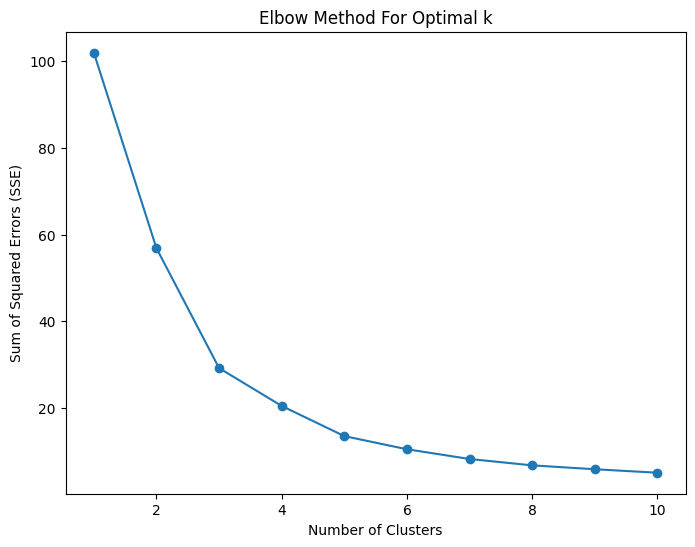

In [14]:
# [Step 12] Draw the SSE Plot
plot_sse(max_clusters=10)

In [15]:
# [Step 11] Print clustering metrics
print("\n\nSSE (Sum of Squared Errors) = %.3f" % kmeans.inertia_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, IDX))



SSE (Sum of Squared Errors) = 29.151
Silhouette Coefficient: 0.495
